# ADACS introductory data analysis workshop

This lesson is adapted from the [Data Carpentry Ecology lesson](http://www.datacarpentry.org/python-ecology-lesson/)
- make sure to open this ipython notebook in the same directory as the data used in this notebook

We'll be using an etherpad to share solutions to challenges, ask questions and chat:
- etherpad let's you collaborate simultaniously on the same document
- everyone has their own identificating colour
- there is also a chat function where you can talk and ask questions if you like
Your isntructor will give you the link to the etherpad on the day of the course.
After finishing the course and updated notebook with the answers will be made available in the github repo.


## Introduction to Python and data analysis using pandas

Python is a high-level, interpreted programming language. This means the code is easy to read for humans and there is no need for us to compile it and in many cases we do not have to think too much about the underlying system fro e.g. memory usage.

As a consequence, we can use it in two ways:
- Using the interpreter as an "advanced calculator" in interactive mode:
- Executing programs/scripts saved as a text file, usually with *.py extension:


# Recap: quick intro to python

### Data types
How information is stored in a DataFrame or a python object affects what we can do with it and the outputs of calculations as well. There are two main types of data that we're explore in this lesson: numeric and character types.


**Numeric Data Types**

- integer
- float

**Character Data Types**

- strings (a word, a sentence, or several sentences)
- strings that contain numbers can not be used for mathematical operations!

**Lists** 

are a common data structure to hold an ordered sequence of
elements. Each element can be accessed by an index.  Note that Python
indexes start with 0 instead of 1:

**Tuple**  

Similar to a list in that it's an ordered sequence of elements. However,
tuples can not be changed once created (they are "immutable"). Tuples are
created by placing comma-separated values inside parentheses `()`.

**Dictionary** 

A container that holds pairs of objects - keys and values.

Dictionaries work a lot like lists - except that you index them with *keys*. 
You can think about a key as a name for or a unique identifier for a set of values
in the dictionary. Keys can only have particular types - they have to be 
"hashable". Strings and numeric types are acceptable, but lists aren't.


### Operators
We can perform mathematical calculations in Python using the basic operators
 `+, -, /, *, %`:
 
** In python 2 if we divide one integer by another, we get an integer! **
The result in python 3 is different where we get a float.
Remember to convert your integers to floats when you want floating point precision for divisions!


We can also use comparison and logic operators:
`<, >, ==, !=, <=, >=` and statements of identity such as
`and, or, not`. The data type returned by this is 
called a _boolean_.
 
### Scripting

 **Comments** start with #
 
 **Methods** are a way to interact with an object (a list, for example). We can invoke 
a method using the dot `.` followed by the method name and a list of arguments in parentheses. 
To find out what methods are available for an object, we can use the built-in `help` command:


A **Library** in Python contains a set of tools (called functions) that perform
tasks on our data. 

Python doesn't load all of the libraries available to it by default. We have to
add an `import` statement to our code in order to use library functions. To import
a library, we use the syntax `import libraryName`. If we want to give the
library a nickname to shorten the command, we can add `as nickNameHere`. 

You only need to load a library once during your session. You can load the library when needed
or you can load all necessary libraries at the beginning of your script. 
This is good practice, especially for the readability of your code

# Working With Pandas DataFrames in Python

## Starting in the same spot

To help the lesson run smoothly, let's ensure everyone is in the same directory.
This should help us avoid path and file name issues. At this time please
navigate to the workshop directory. If you working in IPython Notebook be sure
that you start your notebook in the workshop directory.

A quick aside that there are Python libraries like [OS
Library](https://docs.python.org/3/library/os.html) that can work with our
directory structure, however, that is not our focus today.

If you need to change your directory ```import os``` and use ```os.chdir```

Or you can use **%** to access the command line, e.g. ```% cd folder_name```


## Our Data 

For this lesson, we will be using [Galaxy Zoo DR1 data](https://www.google.com/search?q=galaxy+zoo&ie=utf-8&oe=utf-8&client=firefox-b-ab). Galaxy Zoo is described in Lintott et al. 2008, MNRAS, 389, 1179 and the data release is described in Lintott et al. 2011, 410, 166.

The table we use is an adapted version of Table 2, listing classifications of galaxies which have spectra included in SDSS Data Release 7. The debiased fraction of the votes in elliptical and spiral categories is given, along with flags identifying systems as classified as spiral, elliptical or uncertain.


| Column           | Description                             |
|------------------|-----------------------------------------|
| id               | SDSS ID, objects taken from DR7         |
| ra               | Right Ascension  (HMS)                  |
| dec              | Declination (DMS)                       |
| nvote            | number of votes                         |
| p_e              | debiased vote fraction Ellipticals      |
| p_s              | debiased vote fraction all Spirals      |
| type             | whether final vote is E, S or U         |
| class            | spiral or elliptical class, eg E0 or CW |

Galaxies flagged as ‘elliptical’ or ‘spiral’ require 80 per cent of the vote in that category after the debiasing procedure has been applied; all other galaxies are flagged ‘uncertain’.
Note, the elliptical class is randomly assigned. The spiral class is based on the highest vote fraction of the spiral classes in the Galaxy Zoo DR 1 Table 2 data.


## Pandas in Python

One of the best options for working with tabular data in Python is to use the
[Python Data Analysis Library](http://pandas.pydata.org/) (a.k.a. Pandas). The
Pandas library provides data structures, produces high quality plots with
[matplotlib](http://matplotlib.org/) and integrates nicely with other libraries
that use [NumPy](http://www.numpy.org/) (which is another Python library) arrays.

Each time we call a function that's in a library, we use the syntax
`LibraryName.FunctionName`. Adding the library name with a `.` before the
function name tells Python where to find the function. In the example above, we
have imported Pandas as `pd`. This means we don't have to type out `pandas` each
time we call a Pandas function.

In [1]:
#if you need to change your directory
import os
print(os.getcwd())
os.chdir("data/") #make sure you enter the correct fille path

/Users/268964i/Documents/REPOSITORIES/ADACS/Pawsey_Roadshow_MAR2017


In [2]:
import pandas as pd
#check your version, we need v0.19 or higher
pd.__version__

u'0.19.0'

# Reading CSV Data Using Pandas

We will begin by locating and reading our survey data which are in CSV format.
We can use Pandas' `read_csv` function to pull the file directly into a
[DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe).

## So What's a DataFrame?

A DataFrame is a 2-dimensional data structure that can store data of different
types (including characters, integers, floating point values, factors and more)
in columns. It is similar to a spreadsheet or an SQL table or the `data.frame` in
R. A DataFrame always has an index (0-based). An index refers to the position of 
an element in the data structure.


In [3]:
# note that pd.read_csv is used because we imported pandas as pd
pd.read_csv('GalaxyZoo1.csv')

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U
5,5.877272e+17,00:00:01.57,-09:29:40.3,28,0.830,0.060,U,U
6,5.877312e+17,00:00:01.86,+00:43:09.3,38,0.351,0.473,U,U
7,5.877272e+17,00:00:02.00,+15:41:49.8,26,0.143,0.857,S,EDGE
8,5.877308e+17,00:00:02.10,+15:52:54.2,62,0.355,0.548,U,U
9,5.877272e+17,00:00:02.41,+14:49:19.0,31,0.109,0.789,S,EDGE


We can see that there were 667944 rows parsed. Each row has 9
columns. The first column is the index of the DataFrame. The index is used to
identify the position of the data, but it is not an actual column of the DataFrame. 
It looks like  the `read_csv` function in Pandas  read our file properly. However, 
we haven't saved any data to memory so we can work with it.We need to assign the 
DataFrame to a variable. Remember that a variable is a name for a value, such as `x`, 
or  `data`. We can create a new  object with a variable name by assigning a value to it using `=`.

Let's call the imported survey data `gal_df`:

In [4]:
gal_df=pd.read_csv('GalaxyZoo1.csv')

Notice when you assign the imported DataFrame to a variable, Python does not
produce any output on the screen. We can print the value of the `gal_df`
object by typing its name into the Python command prompt.


## Manipulating Our Survey Data

Now we can start manipulating our data. First, let's check the data type of the
data stored in `gal_df` using the `type` method. The `type` method and
`__class__` attribute tell us that `gal_df` is `<class 'pandas.core.frame.DataFrame'>`.

In [5]:
type(gal_df)

pandas.core.frame.DataFrame

In [6]:
gal_df.__class__

pandas.core.frame.DataFrame

We can also enter `gal_df.dtypes` at our prompt to view the data type for each
column in our DataFrame. `int64` represents numeric integer values - `int64` cells
can not store decimals. `object` represents strings (letters and numbers). `float64`
represents numbers with decimals.

In [7]:
gal_df.dtypes

id       float64
ra        object
dec       object
nvote      int64
p_e      float64
p_s      float64
type      object
class     object
dtype: object

Pandas and base Python use slightly different names for data types. More on this
is in the table below:

| Pandas Type | Native Python Type | Description |
|-------------|--------------------|-------------|
| object | string | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings). |
| int64  | int | Numeric characters. 64 refers to the memory allocated to hold this character. |
| float64 | float | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64, in case your missing value has a decimal. |
| datetime64, timedelta[ns] | N/A (but see the [datetime] module in Python's standard library) | Values meant to hold time data. Look into these for time series experiments. |

[datetime]: http://doc.python.org/2/library/datetime.html


## Remember the way python treats integer division?

**In python 2 integer division returns and integer, as opposed to python 3 where we get a float.**
If at least one of the numebrs is a float then we get a float.
Alternatively we could use ```from __future__ import division```, which will then treat integer division in
python 2 as python 3. However, be aware that if the way python handles division is changed in the future your code might break. So choose what you think is the most stable option for your scripts!


To modify the format of values within our data frame we can use the ```astype``` function (also remember in pandas the type is `float64`).
Don't forget this is a function within pandas so we use it with a `.`, for example to convert 
the `nvote` field to floating point values we would run:


In [8]:
10/3

3

In [9]:
# convert the nvote field from an integer to a float
gal_df['nvote']=gal_df['nvote'].astype('float64')

In [10]:
gal_df.dtypes

id       float64
ra        object
dec       object
nvote    float64
p_e      float64
p_s      float64
type      object
class     object
dtype: object

In [11]:
from __future__ import division
10/3

3.3333333333333335

What happens if we try to convert probability values to integers?

In [12]:
gal_df['p_e']=gal_df['p_e'].astype('int64')

ValueError: Cannot convert NA to integer

Notice that this throws a value error: `ValueError: Cannot convert NA to
integer`. If we look at the `weight` column in the surveys data we notice that
there are NaN (**N**ot **a** **N**umber) values. *NaN* values are undefined
values that cannot be represented mathematically. Pandas, for example, will read
an empty cell in a CSV or Excel sheet as a NaN. NaNs have some desirable
properties: if we were to average the `weight` column without replacing our NaNs,
Python would know to skip over those cells.


In [13]:
gal_df['p_e'].mean()

0.39350000000000496

_Note: older pandas version do not know how to handle NaN, please update to v0.19_

Check your pandas version using `pd.__version__`, if you need to update open a bash shell
and type ```conda update pandas```.

---

## Missing Data Values - NaN

Dealing with missing data values is always a challenge. It's sometimes hard to
know why values are missing - was it because of a data entry error? Or data that
someone was unable to collect? Should the value be 0? We need to know how
missing values are represented in the dataset in order to make good decisions.
If we're lucky, we have some metadata that will tell us more about how null
values were handled.

For instance, in some disciplines, like Remote Sensing, missing data values are
often defined as -9999. Having a bunch of -9999 values in your data could really
alter numeric calculations. Often in spreadsheets, cells are left empty where no
data are available. Pandas will, by default, replace those missing values with
NaN. However it is good practice to get in the habit of intentionally marking
cells that have no data, with a no data value! That way there are no questions
in the future when you (or someone else) explores your data.

### Where Are the NaN's?

Let's explore the NaN values in our data a bit further. 
First, let's figure out how many rows contain NaN values for weight. 
We can do this by identifying how many rows have a NULL value (`.isnull`) or by counting the number of rows that have a meaningful value (e.g., p_e>0):

In [14]:
len(gal_df[pd.isnull(gal_df.p_e)])

100

In [16]:
len(gal_df[gal_df.p_e>=0])

667844

We can replace all NaN values with zeroes using the `.fillna()` method (after
making a copy of the data so we don't lose our work).

However, NaN and 0 yield different analysis results. The mean value when NaN
values are replaced with 0 is different from when NaN values are simply thrown
out or ignored.

In [17]:
#replace nan with 0
df1 = gal_df.copy()
df1['p_e']=df1['p_e'].fillna(0)

In [18]:
#check mean, how does it differ from before?
print(gal_df['p_e'].mean())
df1['p_e'].mean()

0.3935


0.39344108787563525

We can fill NaN values with any value that we chose. The code below fills all
NaN values with a mean for all weight values.

```python
 df1['nvote'] = gal_df['nvote'].fillna(gal_df['nvote'].mean())
```

We could also chose to create a subset of our data, only keeping rows that do
not contain NaN values, using `.dropna()` method.

**The point is to make conscious decisions about how to manage missing data.** 
This is where we think about how our data will be used and how these values will
impact the scientific conclusions made from the data.

Python gives us all of the tools that we need to account for these issues. We
just need to be cautious about how the decisions that we make impact scientific
results.

In [19]:
 df1['p_e'] = gal_df['p_e'].fillna(gal_df['p_e'].mean())

In [20]:
print(gal_df['p_e'].mean())
df1['p_e'].mean()

0.3935


0.3935000000000051

## Useful Ways to View DataFrame objects in Python

There are multiple methods that can be used to summarize and access the data
stored in DataFrames. Let's try out a few. Note that we call the method by using
the object name `gal_df.method`. So `gal_df.columns` provides an index
of all of the column names in our DataFrame.

### Challenges

Try out the methods below to see what they return.

1. `gal_df.columns`.
2. `gal_df.head()`. Also, what does `gal_df.head(15)` do?
3. `gal_df.tail()`.
4. `gal_df.shape`. Take note of the output of the shape method. What format does it return the shape of the DataFrame in?

HINT: [More on tuples, here](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences).


In [30]:
t=gal_df.columns

In [22]:
gal_df.shape

(667944, 8)

In [29]:
t2=gal_df.head(0)

## Calculating Statistics From Data In A Pandas DataFrame

We've read our data into Python. Next, let's perform some quick summary
statistics to learn more about the data that we're working with. We might want
to know how many animals were collected in each plot, or how many of each
species were caught. We can perform summary stats quickly using groups. But
first we need to figure out what we want to group by.

Let's begin by exploring our data:

In [25]:
gal_df.columns.values

array(['id', 'ra', 'dec', 'nvote', 'p_e', 'p_s', 'type', 'class'], dtype=object)

## Selecting Data Using Labels (Column Headings)

To recap, we use square brackets `[]` to select a subset of an Python object. For example,
we can select all of data from a column named `type` from the `gal_df`
DataFrame by name:

```python
gal_df['type']
# this syntax, calling the column as an attribute, gives you the same output
gal_df.type
```

We can also create an new object that contains the data within the `type`
column as follows:

```python
# create an object named gal_types that only contains the `types` column
gal_types = gal_df['types']
```

We can pass a list of column names too, as an index to select columns in that
order. This is useful when we need to reorganize our data.

**NOTE:** If a column name is not contained in the DataFrame, an exception
(error) will be raised.

```python
# select the species and plot columns from the DataFrame
gal_df[['type', 'class']]
# what happens when you flip the order?
gal_df[['class', 'type']]
#what happens if you ask for a column that doesn't exist?
gal_df['types']
```

Let's get a list of all the galaxy types. The `pd.unique` function tells us all of
the unique values in the `type` column:

In [31]:
gal_types = gal_df['type']
pd.unique(gal_df['type'])

array(['U', 'S', 'E'], dtype=object)

### Challenges

1. What is the difference between `len(gal_df.NVOTE)` and `gal_df['NVOTE'].nunique()`?

In [32]:
len(gal_df.nvote)

667944

In [33]:
gal_df['nvote'].nunique()

89

## Groups in Pandas

We often want to calculate summary statistics grouped by subsets or attributes
within fields of our data. For example, we might want to calculate the average
weight of all individuals per plot.

The Pandas function `describe` will return descriptive stats including: mean,
median, max, min, std and count for a particular column in the data. Pandas'
`describe` function will only return summary values for columns containing
numeric data.
We can calculate basic statistics for all records in a single column using the
syntax below:

In [34]:
gal_df['nvote'].describe()

count    667944.000000
mean         38.760986
std          13.827837
min           4.000000
25%          28.000000
50%          34.000000
75%          51.000000
max          94.000000
Name: nvote, dtype: float64

We can also extract one specific metric if we wish:

```python
gal_df['nvote'].min()
gal_df['nvote'].max()
gal_df['nvote'].mean()
gal_df['nvote'].std()
gal_df['nvote'].count()
```

But if we want to summarize by one or more variables, for example galaxy type, we can
use Pandas' `.groupby` method. Once we've created a groupby DataFrame, we
can quickly calculate summary statistics by a group of our choice.

In [35]:
sorted_data = gal_df.groupby('type')
# summary statistics for all numeric columns by type
sorted_data.describe()

id          nvote            p_e            p_s
type                                                                 
E    count  6.219000e+04   62190.000000   62175.000000   62182.000000
     mean   5.878139e+17      37.930777       0.889343       0.057612
     std    1.784691e+14      13.684763       0.067164       0.057186
     min    5.877230e+17       4.000000       0.319000       0.000000
     25%    5.877319e+17      28.000000       0.847000       0.000000
     50%    5.877389e+17      33.000000       0.894000       0.048000
     75%    5.877428e+17      49.000000       0.937000       0.087000
     max    5.888489e+17      94.000000       1.000000       0.681000
S    count  1.902250e+05  190225.000000  190194.000000  190180.000000
     mean   5.878146e+17      38.630690       0.101943       0.862874
     std    1.804956e+14      13.811679       0.121809       0.127439
     min    5.877230e+17      10.000000       0.000000       0.087000
     25%    5.877322e+17      28.000000       0.023000       0.810000
     50%    5.877390e+17      33.000000       0.060000       0.895000
     75%    5.877428e+17      51.000000       0.133000       0.956000
     max    5.888489e+17      93.000000       0.913000       1.000000
U    count  4.155290e+05  415529.000000  415475.000000  415482.000000
     mean   5.878143e+17      38.944887       0.452766       0.373474
     std    1.793616e+14      13.851311       0.243965       0.230954
     min    5.877230e+17       4.000000       0.000000       0.000000
     25%    5.877319e+17      28.000000       0.235000       0.176000
     50%    5.877386e+17      34.000000       0.466000       0.338000
     75%    5.877428e+17      51.000000       0.664000       0.561000
     max    5.888489e+17      91.000000       0.967000       0.973000

In [36]:
# provide the mean for each numeric column by type
sorted_data.mean()

,id,nvote,p_e,p_s
type,,,,
E,5.878139e+17,37.930777,0.889343,0.057612
S,5.878146e+17,38.630690,0.101943,0.862874
U,5.878143e+17,38.944887,0.452766,0.373474


The `groupby` command is powerful in that it allows us to quickly generate
summary stats.

## Quickly Creating Summary Counts in Pandas

Let's next count the number of galaxies for each type. We can do this in a few
ways, but we'll use `groupby` combined with a `count()` method.


```python
# count the number of samples by type
type_counts = gal_df.groupby('type')['id'].count()
```

Or, we can also count just the rows that have type='U':

```python
gal_df.groupby('type')['id'].count()['U']
```


### Challenge

1. What happens when you group by two columns using the following syntax and
    then grab mean values:
	- `sorted_data2 = gal_df.groupby(['type','p_e'])`
	- `sorted_data2.mean()`
2. Summarize number of votes for each galaxy class in your data. HINT: you can use the
   following syntax to only create summary statistics for one column in your data
   `by_class['nvote'].describe()`

In [37]:
sorted_data2 = gal_df.groupby(['type','p_e'])
sorted_data2.mean()

id      nvote       p_s
type p_e                                     
E    0.319  5.877417e+17  29.000000  0.681000
     0.324  5.880134e+17  56.000000  0.584000
     0.325  5.877308e+17  37.000000  0.604000
     0.328  5.877368e+17  18.000000  0.672000
     0.359  5.877343e+17  30.000000  0.479000
     0.374  5.877368e+17  60.000000  0.537000
     0.376  5.877319e+17  55.000000  0.486000
     0.404  5.877326e+17  64.000000  0.410000
     0.407  5.877389e+17  62.000000  0.560000
     0.419  5.880180e+17  26.000000  0.581000
     0.423  5.877398e+17  29.000000  0.408000
     0.427  5.877272e+17  19.000000  0.438000
     0.428  5.877260e+17  52.000000  0.354000
     0.430  5.877426e+17  32.000000  0.494000
     0.431  5.877400e+17  21.000000  0.353000
     0.432  5.877415e+17  34.000000  0.434000
     0.439  5.880109e+17  27.000000  0.399000
     0.445  5.877417e+17  40.000000  0.555000
     0.448  5.877320e+17  27.000000  0.478000
     0.451  5.877368e+17  30.000000  0.459000
     0.455  5.877397e+17  36.000000  0.305000
     0.457  5.877390e+17  39.000000  0.543000
     0.459  5.877294e+17  29.000000  0.541000
     0.461  5.880134e+17  66.000000  0.388000
     0.464  5.878719e+17  45.000000  0.486000
     0.466  5.877332e+17  40.000000  0.371000
     0.475  5.877290e+17  27.000000  0.456000
     0.478  5.878742e+17  33.000000  0.439000
     0.480  5.877369e+17  48.000000  0.401000
     0.481  5.880134e+17  34.000000  0.463000
...                  ...        ...       ...
U    0.932  5.878754e+17  36.500000  0.061167
     0.933  5.878496e+17  38.470588  0.056647
     0.934  5.878383e+17  32.742857  0.063000
     0.935  5.877763e+17  39.150000  0.059750
     0.936  5.877735e+17  35.954545  0.061364
     0.937  5.878983e+17  36.250000  0.057833
     0.938  5.879009e+17  34.882353  0.055294
     0.939  5.878020e+17  39.846154  0.054692
     0.940  5.877605e+17  38.090909  0.056909
     0.941  5.877699e+17  32.750000  0.056467
     0.942  5.878296e+17  41.933333  0.054267
     0.943  5.878586e+17  36.687500  0.055188
     0.944  5.877635e+17  35.000000  0.053800
     0.945  5.877621e+17  36.272727  0.051727
     0.946  5.879504e+17  43.000000  0.045667
     0.947  5.878097e+17  30.733333  0.051867
     0.948  5.878508e+17  50.600000  0.048800
     0.949  5.877716e+17  35.133333  0.049733
     0.950  5.877920e+17  40.400000  0.050000
     0.951  5.877675e+17  39.777778  0.045444
     0.952  5.877339e+17  36.444444  0.046111
     0.953  5.878291e+17  43.333333  0.041500
     0.954  5.878067e+17  31.000000  0.046000
     0.955  5.877372e+17  36.000000  0.045000
     0.956  5.878035e+17  30.750000  0.044000
     0.959  5.877300e+17  46.500000  0.041000
     0.960  5.877352e+17  54.000000  0.040000
     0.961  5.877334e+17  47.000000  0.039000
     0.963  5.877437e+17  55.500000  0.037000
     0.967  5.877365e+17  54.000000  0.033000

[2305 rows x 3 columns]

In [38]:
by_class = gal_df.groupby('class')
by_class['nvote'].describe()

class       
ACW    count     41008.000000
       mean         38.553941
       std          13.752884
       min          11.000000
       25%          28.000000
       50%          33.000000
       75%          50.000000
       max          87.000000
CW     count     38489.000000
       mean         38.580374
       std          13.808416
       min          10.000000
       25%          28.000000
       50%          33.000000
       75%          50.000000
       max          87.000000
E0     count      7769.000000
       mean         38.084052
       std          13.725845
       min          12.000000
       25%          28.000000
       50%          33.000000
       75%          49.000000
       max          84.000000
E1     count      7718.000000
       mean         38.046644
       std          13.589567
       min          14.000000
       25%          28.000000
       50%          33.000000
                    ...      
E6     std          13.514799
       min          11.0000


## Basic Math Functions

If we wanted to, we could perform math on an entire column of our data. For
example let's multiply all votes by 2. A more practical use of this might
be to normalize the data according to a mean, area, or some other value
calculated from our data.

In [42]:
# multiply all votes by 2
gal_df['nvote']*=2

In [44]:
gal_df['nvote'].head()

0    118.0
1     36.0
2    136.0
3    104.0
4    118.0
Name: nvote, dtype: float64

## Quick & Easy Plotting Data Using Pandas

We can plot our summary stats using Pandas, too.

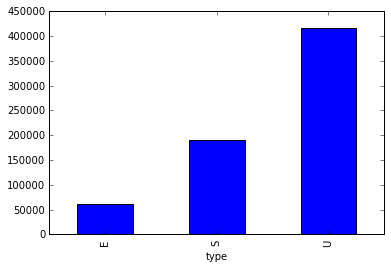

In [45]:
# make sure figures appear inline in Ipython Notebook
%matplotlib inline
# create a quick bar chart
votes = gal_df.groupby('type')['id'].count()
votes.plot(kind='bar')

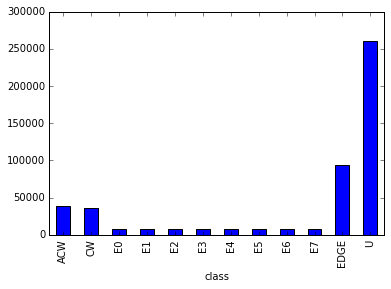

In [46]:
#We can also look at how many galaxies were assigned to each class:
total_count = gal_df['id'].groupby(gal_df['class']).nunique()
# let's plot that too
total_count.plot(kind='bar')

### Challenge Activities

1. Create a plot of average votes across all class of galaxies.
2. Create a plot of total votes for each type of galaxy for the entire dataset.

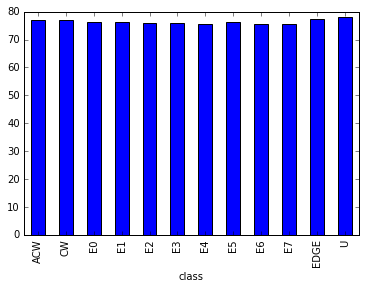

In [47]:
gal_df['nvote'].groupby(gal_df['class']).mean().plot(kind='bar')

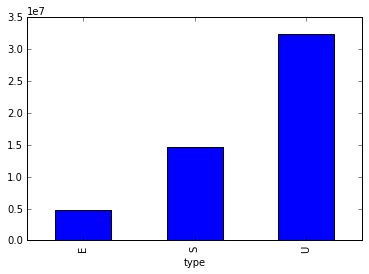

In [48]:
gal_df['nvote'].groupby(gal_df['type']).sum().plot(kind='bar')

# Indexing & Slicing in Python

We often want to work with subsets of a **DataFrame** object. There are
different ways to accomplish this including: using labels (ie, column headings - as used previously),
numeric ranges or specific x,y index locations.

## Extracting Range based Subsets: Slicing

**REMINDER**: Python Uses 0-based Indexing

Let's remind ourselves that Python uses 0-based
indexing. This means that the first element in an object is located at position
0. This is different from other tools like R and Matlab that index elements
within objects starting at 1.

```python
# Create a list of numbers:
a = [1,2,3,4,5]
```

[indexing diagram](https://github.com/datacarpentry/python-ecology-lesson/blob/gh-pages/fig/slicing-indexing.svg)

[slicing diagram](https://github.com/datacarpentry/python-ecology-lesson/tree/gh-pages/fig/slicing-slicing.svg)


In [49]:
a = [1,2,3,4,5]

In [50]:
a[0]

1

In [51]:
a[5]

IndexError: list index out of range

## Slicing Subsets of Rows in Python

Slicing using the `[]` operator selects a set of rows and/or columns from a
DataFrame. To slice out a set of rows, you use the following syntax:
`data[start:stop]`. When slicing in pandas the start bound is included in the
output. The stop bound is one step BEYOND the row you want to select. So if you
want to select rows 0, 1 and 2 your code would look like this:

```python
# select rows 0,1,2 (but not 3)
gal_df[0:3]
```

The stop bound in Python is different from what you might be used to in
languages like Matlab and R.

```python
# select the first, second and third rows from the surveys variable
gal_df[0:3]
# select the first 5 rows (rows 0,1,2,3,4)
gal_df[:5]
# select the last element in the list
gal_df[-1:]
```

In [52]:
gal_df[0:5:2]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,118.0,0.610,0.186,U,U
2,5.877272e+17,00:00:01.03,-10:56:48.0,136.0,0.432,0.428,U,U
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


We can also reassign values within subsets of our DataFrame. But before we do that, let's make a 
copy of our DataFrame so as not to modify our original imported data. 

```python
# copy the surveys dataframe so we don't modify the original DataFrame
gal_copy = gal_df

# set the first three rows of data in the DataFrame to 0
gal_copy[0:3] = 0
```

Next, try the following code: 

```python
gal_copy.head()
gal_df.head()
```
What is the difference between the two data frames?

In [53]:
gal_copy = gal_df
gal_copy[0:3] = 0

In [54]:
gal_copy.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,0.000000e+00,0,0,0.0,0.000,0.000,0,0
1,0.000000e+00,0,0,0.0,0.000,0.000,0,0
2,0.000000e+00,0,0,0.0,0.000,0.000,0,0
3,5.877308e+17,00:00:01.38,+15:30:35.3,104.0,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


In [55]:
gal_df.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,0.000000e+00,0,0,0.0,0.000,0.000,0,0
1,0.000000e+00,0,0,0.0,0.000,0.000,0,0
2,0.000000e+00,0,0,0.0,0.000,0.000,0,0
3,5.877308e+17,00:00:01.38,+15:30:35.3,104.0,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,118.0,0.640,0.290,U,U


## Referencing Objects vs Copying Objects in Python

We might have thought that we were creating a fresh copy of the `gal_df` objects when we 
used the code `surveys_copy = gal_df`. However the statement  y = x doesn’t create a copy of our DataFrame. 
It creates a new variable y that refers to the **same** object x refers to. This means that there is only one object 
(the DataFrame), and both x and y refer to it. So when we assign the first 3 columns the value of 0 using the 
`surveys_copy` DataFrame, the `gal_df` DataFrame is modified too. To create a fresh copy of the `gal_df`
DataFrame we use the syntax y=x.copy(). But before we have to read the gal_df again because the current version contains the unintentional changes made to the first 3 columns.

```python
gal_df = pd.read_csv("GalaxyZoo1.csv")
gal_copy= gal_df.copy()

```

In [56]:
gal_df = pd.read_csv("GalaxyZoo1.csv")

In [57]:
gal_df.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
1,5.877272e+17,00:00:00.74,-09:13:20.2,18,0.203,0.797,S,EDGE
2,5.877272e+17,00:00:01.03,-10:56:48.0,68,0.432,0.428,U,U
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


In [58]:
gal_copy= gal_df.copy()
gal_copy[0:3] = 0

In [60]:
gal_copy.head()

,id,ra,dec,nvote,p_e,p_s,type,class
0,0.000000e+00,0,0,0,0.000,0.000,0,0
1,0.000000e+00,0,0,0,0.000,0.000,0,0
2,0.000000e+00,0,0,0,0.000,0.000,0,0
3,5.877308e+17,00:00:01.38,+15:30:35.3,52,0.885,0.077,E,E1
4,5.877312e+17,00:00:01.55,-00:05:33.3,59,0.640,0.290,U,U


## Slicing Subsets of Rows and Columns in Python

We can select specific ranges of our data in both the row and column directions
using either label or integer-based indexing.

- `loc`: indexing via *labels* (which can be integers)
- `iloc`: indexing via *integers*

To select a subset of rows AND columns from our DataFrame, we can use the `iloc`
method. For example, we can select month, day and year (columns 2, 3 and 4 if we
start counting at 1), like this:

```python
gal_df.iloc[0:3, 1:4]
```

In [61]:
gal_df.iloc[0:3, 1:4]

,ra,dec,nvote
0,00:00:00.41,-10:22:25.7,59
1,00:00:00.74,-09:13:20.2,18
2,00:00:01.03,-10:56:48.0,68


Notice that we asked for a slice from 0:3. This yielded 3 rows of data. When you
ask for 0:3, you are actually telling python to start at index 0 and select rows
0, 1, 2 **up to but not including 3**.


Let's next explore some other ways to index and select subsets of data:

In [62]:
# select all columns for rows of index values 0 and 10
gal_df.loc[[0, 10], :]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59,0.610,0.186,U,U
10,5.877308e+17,00:00:02.58,+15:02:28.3,24,0.147,0.701,U,U


In [63]:
# what does this do?
gal_df.loc[0, ['id', 'p_e', 'p_s']]


id     5.87727e+17
p_e           0.61
p_s          0.186
Name: 0, dtype: object

In [64]:
# What happens when you type the code below?
gal_df.loc[[0, 10, 668946], :]

,id,ra,dec,nvote,p_e,p_s,type,class
0,5.877272e+17,00:00:00.41,-10:22:25.7,59.0,0.610,0.186,U,U
10,5.877308e+17,00:00:02.58,+15:02:28.3,24.0,0.147,0.701,U,U
668946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NOTE: Labels must be found in the DataFrame or you will get a `KeyError`. The
start bound and the stop bound are **included**.  When using `loc`, integers
*can* also be used, but they refer to the **index label** and not the position. Thus
when you use `loc`, and select 1:4, you will get a different result than using
`iloc` to select rows 1:4.

We can also select a specific data value according to the specific row and
column location within the data frame using the `iloc` function:
`dat.iloc[row,column]`.


```python
gal_df.iloc[2,6]
```

which gives **output**

```
'F'
```

Remember that Python indexing begins at 0. So, the index location [2, 6] selects
the element that is 3 rows down and 7 columns over in the DataFrame.

## Challenge Activities

1. What happens when you type:
	- gal_df[0:4]
	- gal_df[:5]
	- gal_df[-1:]

2. What happens when you call:
    - `dat.iloc[0:4, 1:4]`
    - `dat.loc[0:4, 1:4]`
    - How are the two commands different?

## Subsetting Data Using Criteria & Making Masks

A mask can be useful to locate where a particular subset of values exist or
don't exist - for example,  NaN, or "Not a Number" values. To understand masks,
we also need to understand `BOOLEAN` objects in python.

Boolean values include `true` or `false`. So for example

```python
# set x to 5
x = 5
# what does the code below return?
x > 5
# how about this?
x == 5
```
When we ask python what the value of `x > 5` is, we get `False`. This is because x
is not greater than 5 it is equal to 5. To create a boolean mask, you first create the
True / False criteria (e.g. values > 5 = True). Python will then assess each
value in the object to determine whether the value meets the criteria (True) or
not (False). Python creates an output object that is the same shape as
the original object, but with a True or False value for each index location.

You can use the syntax below when querying data from a DataFrame. Experiment
with selecting various subsets of the "surveys" data.

* Equals: `==`
* Not equals: `!=`
* Greater than, less than: `>` or `<`
* Greater than or equal to `>=`
* Less than or equal to `<=`

Let's try this out. 
We can select all rows that have 80 votes.

In [ ]:
gal_df[gal_df.nvote == 80]

In [ ]:
#Or we can select all rows that do not contain 80 votes.
gal_df[gal_df.nvote != 80]

In [ ]:
#We can define sets of criteria too:
gal_df[(gal_df.nvote >= 80) & (gal_df.year <= 100)]

Next, let's identify all locations in the survey data that have
null (missing or NaN) data values. We can use the `isnull` method to do this.
Each cell with a null value will be assigned a value of  `True` in the new
boolean object.

In [ ]:
pd.isnull(gal_df)

To select the rows where there are null values,  we can use 
the mask as an index to subset our data as follows:

```python
#To select just the rows with NaN values, we can use the .any method
gal_df[pd.isnull(gal_df).any(axis=1)]
```

We can run isnull on a particular column too. What does the code below do?

```python
# what does this do?
empty_pE = gal_df[pd.isnull(gal_df['p_e'])
```

Let's take a minute to look at the statement above. 

We are using the Boolean object as an index. 
We are asking python to select rows that have a `NaN` value for the probability of a galaxy being Elliptical.

In [ ]:
empty_pE = gal_df[pd.isnull(gal_df['p_e'])]
empty_pE.describe()

### Challenge Activities

1. You can use the `isin` command in python to query a DataFrame based upon a list of values as follows:
   `gal_df[gal_df['class'].isin([listGoesHere])]`. Use the `isin` function to find all galaxies Elliptical galaxies of class E0, E1 and E7. How many records contain these values?
2. The `~` symbol in Python can be used to return the OPPOSITE of the selection that you specify in python. It is equivalent to **is not in**. Write a query that selects all Spiral galaxies that are not classed as 'OTHER' an 'EDGE'.
3. Create a new DataFrame that only contains valid (i.e. no NAN probability) observations of Spiral galaxies with over 100 votes.

# Merging DataFrames


In many "real world" situations, the data that we want to use come in multiple
files. We often need to combine these files into a single DataFrame to analyze
the data. The pandas package provides [various methods for combining
DataFrames](http://pandas.pydata.org/pandas-docs/stable/merging.html) including
`merge` and `concat`.

To work through the examples below, we first need to load the galaxy zoo and
SDSS files into pandas DataFrames. In iPython:

``` python
import pandas as pd
gal_df = pd.read_csv('GalaxyZooSub.csv',
                         keep_default_na=False, na_values=["NA"])
sdss = pd.read_csv('SDSS_blue_centre_query.csv',
                         keep_default_na=False, na_values=[""])
gal_df.dtypes
sdss.dtypes
```

In [65]:
import pandas as pd
gal_df = pd.read_csv('GalaxyZooSub.csv',
                         keep_default_na=False, na_values=["NA"])
sdss = pd.read_csv('SDSS_blue_centre_query.csv',
                         keep_default_na=False, na_values=[""])

In [66]:
gal_df.dtypes

id         int64
ra        object
dec       object
nvote      int64
p_e      float64
p_s      float64
type      object
class     object
dtype: object

In [67]:
sdss.dtypes

objID         int64
ra          float64
dec         float64
z           float64
r           float64
expRad_r    float64
expAB_r     float64
deVRad_r    float64
deVAB_r     float64
dtype: object

Take note that the `read_csv` method we used can take some additional options which
we didn't use previously. Many functions in python have a set of options that
can be set by the user if needed. In this case, we have told Pandas to assign
empty values in our CSV to NaN `keep_default_na=False, na_values=[""]`.
[http://pandas.pydata.org/pandas-docs/dev/generated/pandas.io.parsers.read_csv.html](More
about all of the read_csv options here.)


## Concatinating

We can use the `concat` function in Pandas to append either columns or rows from
one DataFrame to another.  Let's grab two subsets of our data to see how this
works.


In [68]:
# read in first 10 lines of gal_df table
gal_sub=gal_df.head(10)
gal_sub

,id,ra,dec,nvote,p_e,p_s,type,class
0,587727178450665600,00:10:51.39,-10:46:18.9,30,0.200,0.300,U,U
1,587727178450665600,00:10:53.39,-10:42:07.0,28,0.685,0.257,U,U
2,587727178450665600,00:11:22.37,-10:43:14.2,37,0.548,0.117,U,U
3,587727178451058944,00:14:56.97,-10:50:09.2,29,0.897,0.069,E,E3
4,587727180060885248,00:07:28.25,-09:25:03.8,53,0.453,0.472,U,U
5,587727180598280320,00:12:15.01,-09:00:03.8,42,0.018,0.982,S,EDGE
6,587727180598280320,00:12:15.32,-08:59:16.2,36,0.106,0.628,U,U
7,587727180598280320,00:12:32.55,-09:02:08.0,22,0.135,0.809,S,EDGE
8,587727180598280320,00:12:33.25,-09:04:42.2,28,0.786,0.000,U,U
9,587727221413708032,00:01:47.08,+14:20:51.9,22,0.337,0.347,U,U


In [69]:
# grab the last 10 rows (minus the last one)
gal_last10=gal_df[-11:-1]
gal_last10

,id,ra,dec,nvote,p_e,p_s,type,class
1632,587731886275362944,08:36:38.24,+40:59:44.3,60,0.933,0.050,E,E5
1633,587731886276018432,08:42:31.62,+42:06:55.7,34,0.049,0.912,S,EDGE
1634,587731886276018432,08:42:48.85,+42:06:07.0,63,0.146,0.760,S,ACW
1635,587731886810726528,08:22:34.08,+38:52:01.4,61,0.764,0.102,U,U
1636,587731886810726528,08:22:43.39,+38:54:43.9,28,0.841,0.051,E,E1
1637,587731886810726528,08:22:56.40,+38:45:06.7,31,0.084,0.497,U,U
1638,587731886812037504,08:33:55.31,+41:03:03.6,37,0.018,0.928,S,ACW
1639,587731886812102912,08:34:20.29,+41:10:33.2,49,0.050,0.762,U,U
1640,587731886812102912,08:34:33.49,+41:06:07.6,40,0.948,0.027,E,E7
1641,587731886812168192,08:34:24.23,+41:16:02.5,52,0.134,0.847,S,ACW


In [70]:
#reset the index values to the second dataframe appends properly
# drop=True option avoids adding new index column with old index values
gal_last10 = gal_last10.reset_index(drop=True)
gal_last10

,id,ra,dec,nvote,p_e,p_s,type,class
0,587731886275362944,08:36:38.24,+40:59:44.3,60,0.933,0.050,E,E5
1,587731886276018432,08:42:31.62,+42:06:55.7,34,0.049,0.912,S,EDGE
2,587731886276018432,08:42:48.85,+42:06:07.0,63,0.146,0.760,S,ACW
3,587731886810726528,08:22:34.08,+38:52:01.4,61,0.764,0.102,U,U
4,587731886810726528,08:22:43.39,+38:54:43.9,28,0.841,0.051,E,E1
5,587731886810726528,08:22:56.40,+38:45:06.7,31,0.084,0.497,U,U
6,587731886812037504,08:33:55.31,+41:03:03.6,37,0.018,0.928,S,ACW
7,587731886812102912,08:34:20.29,+41:10:33.2,49,0.050,0.762,U,U
8,587731886812102912,08:34:33.49,+41:06:07.6,40,0.948,0.027,E,E7
9,587731886812168192,08:34:24.23,+41:16:02.5,52,0.134,0.847,S,ACW


When we concatenate DataFrames, we need to specify the axis. `axis=0` tells
Pandas to stack the second DataFrame under the first one. It will automatically
detect whether the column names are the same and will stack accordingly.
`axis=1` will stack the columns in the second DataFrame to the RIGHT of the
first DataFrame. To stack the data vertically, we need to make sure we have the
same columns and associated column format in both datasets. When we stack
horizonally, we want to make sure what we are doing makes sense (ie the data are
related in some way).


In [71]:
# stack the DataFrames on top of each other
vertical_stack = pd.concat([gal_sub,gal_last10], axis=0)
vertical_stack

,id,ra,dec,nvote,p_e,p_s,type,class
0,587727178450665600,00:10:51.39,-10:46:18.9,30,0.200,0.300,U,U
1,587727178450665600,00:10:53.39,-10:42:07.0,28,0.685,0.257,U,U
2,587727178450665600,00:11:22.37,-10:43:14.2,37,0.548,0.117,U,U
3,587727178451058944,00:14:56.97,-10:50:09.2,29,0.897,0.069,E,E3
4,587727180060885248,00:07:28.25,-09:25:03.8,53,0.453,0.472,U,U
5,587727180598280320,00:12:15.01,-09:00:03.8,42,0.018,0.982,S,EDGE
6,587727180598280320,00:12:15.32,-08:59:16.2,36,0.106,0.628,U,U
7,587727180598280320,00:12:32.55,-09:02:08.0,22,0.135,0.809,S,EDGE
8,587727180598280320,00:12:33.25,-09:04:42.2,28,0.786,0.000,U,U
9,587727221413708032,00:01:47.08,+14:20:51.9,22,0.337,0.347,U,U


In [72]:
# place the DataFrames side by side
horizontal_stack = pd.concat([gal_sub,gal_last10], axis=1)
horizontal_stack

,id,ra,dec,nvote,p_e,p_s,type,class,id,ra,dec,nvote,p_e,p_s,type,class
0,587727178450665600,00:10:51.39,-10:46:18.9,30,0.200,0.300,U,U,587731886275362944,08:36:38.24,+40:59:44.3,60,0.933,0.050,E,E5
1,587727178450665600,00:10:53.39,-10:42:07.0,28,0.685,0.257,U,U,587731886276018432,08:42:31.62,+42:06:55.7,34,0.049,0.912,S,EDGE
2,587727178450665600,00:11:22.37,-10:43:14.2,37,0.548,0.117,U,U,587731886276018432,08:42:48.85,+42:06:07.0,63,0.146,0.760,S,ACW
3,587727178451058944,00:14:56.97,-10:50:09.2,29,0.897,0.069,E,E3,587731886810726528,08:22:34.08,+38:52:01.4,61,0.764,0.102,U,U
4,587727180060885248,00:07:28.25,-09:25:03.8,53,0.453,0.472,U,U,587731886810726528,08:22:43.39,+38:54:43.9,28,0.841,0.051,E,E1
5,587727180598280320,00:12:15.01,-09:00:03.8,42,0.018,0.982,S,EDGE,587731886810726528,08:22:56.40,+38:45:06.7,31,0.084,0.497,U,U
6,587727180598280320,00:12:15.32,-08:59:16.2,36,0.106,0.628,U,U,587731886812037504,08:33:55.31,+41:03:03.6,37,0.018,0.928,S,ACW
7,587727180598280320,00:12:32.55,-09:02:08.0,22,0.135,0.809,S,EDGE,587731886812102912,08:34:20.29,+41:10:33.2,49,0.050,0.762,U,U
8,587727180598280320,00:12:33.25,-09:04:42.2,28,0.786,0.000,U,U,587731886812102912,08:34:33.49,+41:06:07.6,40,0.948,0.027,E,E7
9,587727221413708032,00:01:47.08,+14:20:51.9,22,0.337,0.347,U,U,587731886812168192,08:34:24.23,+41:16:02.5,52,0.134,0.847,S,ACW


### Challenge - Row Index Values and Concat
Have a look at the `vertical_stack` dataframe? Notice anything unusual?
The row indexes for the two data frames `survey_sub` and `survey_sub_last10`
have been repeated. We can reindex the new dataframe using the `reset_index()` method.

In [73]:
vertical_stack=vertical_stack.reset_index(drop=True)
vertical_stack

,id,ra,dec,nvote,p_e,p_s,type,class
0,587727178450665600,00:10:51.39,-10:46:18.9,30,0.200,0.300,U,U
1,587727178450665600,00:10:53.39,-10:42:07.0,28,0.685,0.257,U,U
2,587727178450665600,00:11:22.37,-10:43:14.2,37,0.548,0.117,U,U
3,587727178451058944,00:14:56.97,-10:50:09.2,29,0.897,0.069,E,E3
4,587727180060885248,00:07:28.25,-09:25:03.8,53,0.453,0.472,U,U
5,587727180598280320,00:12:15.01,-09:00:03.8,42,0.018,0.982,S,EDGE
6,587727180598280320,00:12:15.32,-08:59:16.2,36,0.106,0.628,U,U
7,587727180598280320,00:12:32.55,-09:02:08.0,22,0.135,0.809,S,EDGE
8,587727180598280320,00:12:33.25,-09:04:42.2,28,0.786,0.000,U,U
9,587727221413708032,00:01:47.08,+14:20:51.9,22,0.337,0.347,U,U


## Writing Out Data to CSV

We can use the `to_csv` command to do export a DataFrame in CSV format. Note that the code
below will by default save the data into the current working directory. We can
save it to a different folder by adding the foldername and a slash to the file
`vertical_stack.to_csv('foldername/out.csv')`.

```python
# Write DataFrame to CSV 
vertical_stack.to_csv('out.csv')
```

Check out your working directory to make sure the CSV wrote out properly, and
that you can open it! If you want, try to bring it back into python to make sure
it imports properly.

```python	
# for kicks read our output back into python and make sure all looks good
new_output = pd.read_csv('out.csv', keep_default_na=False, na_values=["NA"])
```

In [74]:
vertical_stack.to_csv('out.csv')

# Joining DataFrames

When we concatenated our DataFrames we simply added them to each other -
stacking them either vertically or side by side. Another way to combine
DataFrames is to use columns in each dataset that contain common values (a
common unique id). Combining DataFrames using a common field is called
"joining". The columns containing the common values are called "join key(s)".
Joining DataFrames in this way is often useful when one DataFrame is a "lookup
table" containing additional data that we want to include in the other. 

For example, the `SDSS_blue_centre_query.csv` file that we've been loaded is a query from the SDSS DR7 database for 1000 galaxies with blue centres (things we would expect to be Spirals). 
This table contains the ID, postition, redshift and r-band magnitude as well as size measurements.

## Joining Two DataFrames 

### Identifying join keys

To identify appropriate join keys we first need to know which field(s) are
shared between the files (DataFrames). We might inspect both DataFrames to
identify these columns. If we are lucky, both DataFrames will have columns with
the same name that also contain the same data. If we are less lucky, we need to
identify a (differently-named) column in each DataFrame that contains the same
information.

Check the column names for gal_df and sdss

In [75]:
print(gal_df.columns.values)
print(sdss.columns.values)


['id' 'ra' 'dec' 'nvote' 'p_e' 'p_s' 'type' 'class']
['objID' 'ra' 'dec' 'z' 'r' 'expRad_r' 'expAB_r' 'deVRad_r' 'deVAB_r']


In our example, the join key is the column containing the object
identifier. We could also use 'ra' and 'dec', however, they are not presented in the same units thus joining on id will be esier.

There are [different types of joins](http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/), so we
also need to decide which type of join makes sense for our analysis.

## Inner joins

The most common type of join is called an _inner join_. An inner join combines
two DataFrames based on a join key and returns a new DataFrame that contains
**only** those rows that have matching values in *both* of the original
DataFrames. 

Inner joins yield a DataFrame that contains only rows where the value being
joins exists in BOTH tables. An example of an inner join, adapted from [this
page](http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/) is below:

![Inner join -- courtesy of codinghorror.com](http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b012877702708970c-pi.png)

The pandas function for performing joins is called `merge` and an inner join is
the default option:  

In [76]:
merged_inner = pd.merge(left=gal_df,right=sdss, left_on='id', right_on='objID')
# if both column names were 'id', we could skip the `left_on`
# and `right_on` arguments and still get the same result

In [77]:
# what's the size of the output data?
merged_inner.shape

(24, 17)

In [78]:
merged_inner

,id,ra_x,dec_x,nvote,p_e,p_s,type,class,objID,ra_y,dec_y,z,r,expRad_r,expAB_r,deVRad_r,deVAB_r
0,587731513679806592,01:17:31.04,+00:46:50.9,59,0.277,0.637,U,U,587731513679806592,19.379312,0.780805,0.072401,16.141273,3.229078,0.707623,6.374486,0.705669
1,587731513679806592,01:17:52.41,+00:46:50.8,27,0.155,0.845,S,EDGE,587731513679806592,19.379312,0.780805,0.072401,16.141273,3.229078,0.707623,6.374486,0.705669
2,588015509818769792,01:54:41.83,+00:36:41.8,70,0.185,0.693,U,U,588015509818769792,28.674315,0.611604,0.015408,17.427435,6.595679,0.454282,19.120083,0.396147
3,587727180615385216,02:50:12.48,-07:05:05.7,30,0.026,0.937,S,EDGE,587727180615385216,42.551995,-7.084910,0.072446,17.391731,4.901868,0.165823,11.124749,0.132615
4,587727180615385216,02:50:19.53,-07:02:23.3,39,0.442,0.455,U,U,587727180615385216,42.551995,-7.084910,0.072446,17.391731,4.901868,0.165823,11.124749,0.132615
5,587731513157353728,03:29:39.53,+00:19:59.1,26,0.876,0.047,E,E1,587731513157353728,52.371281,0.350567,0.317799,18.280933,1.427017,0.838607,2.458734,0.905905
6,587735042533818624,07:59:49.81,+22:03:13.2,24,0.522,0.352,U,U,587735042533818624,119.957541,22.053675,0.199291,17.823555,3.103296,0.835931,8.061345,0.842250
7,587741489813586048,07:53:37.12,+12:39:28.3,64,0.471,0.238,U,U,587741489813586048,118.406668,12.653790,0.196084,17.842041,4.644081,0.221541,10.188110,0.202037
8,587741489813586048,07:53:37.60,+12:39:13.7,43,0.018,0.957,S,EDGE,587741489813586048,118.406668,12.653790,0.196084,17.842041,4.644081,0.221541,10.188110,0.202037
9,587741489813586048,07:53:43.00,+12:35:58.9,28,0.235,0.765,S,EDGE,587741489813586048,118.406668,12.653790,0.196084,17.842041,4.644081,0.221541,10.188110,0.202037


The result of an inner join of `gal_df` and `sdss` is a new DataFrame
that contains the combined set of columns from `gal_df` and `sdss`. It
*only* contains rows that have an ID that is the same in
both the `gal_df` and `sdss` DataFrames. 

In other words, if a row in
`gal_df` has a value of `id` that does *not* appear in the `objID`
column of `sdss`, it will not be included in the DataFrame returned by an
inner join.  Similarly, if a row in `sdss` has a value of `objID`
that does *not* appear in the `id` column of `gal_df`, that row will not
be included in the DataFrame returned by an inner join.

The two DataFrames that we want to join are passed to the `merge` function using
the `left` and `right` argument. The `left_on='id'` argument tells `merge`
to use the `id` column as the join key from `gal_df` (the `left`
DataFrame). Similarly , the `right_on='objID'` argument tells `merge` to
use the `objID` column as the join key from `sdss` (the `right`
DataFrame). For inner joins, the order of the `left` and `right` arguments does
not matter.

The result `merged_inner` DataFrame contains all of the columns from `survey_sub` as well as all the columns from `sdss`.

Notice that `merged_inner` has way fewer rows than `gal_df`. This is an
indication that there were rows in `gal_df` with value(s) for `id` that
do not exist as value(s) for `objID` in `sdss`.
 
## Left joins

What if we want to add information from `sdss` to `gal_df` without
losing any of the information from `gal_df`? In this case, we use a different
type of join called a "left outer join", or a "left join".

Like an inner join, a left join uses join keys to combine two DataFrames. Unlike
an inner join, a left join will return *all* of the rows from the `left`
DataFrame, even those rows whose join key(s) do not have values in the `right`
DataFrame.  Rows in the `left` DataFrame that are missing values for the join
key(s) in the `right` DataFrame will simply have null (i.e., NaN or None) values
for those columns in the resulting joined DataFrame.

Note: a left join will still discard rows from the `right` DataFrame that do not
have values for the join key(s) in the `left` DataFrame.

![Left Join](http://blog.codinghorror.com/content/images/uploads/2007/10/6a0120a85dcdae970b01287770273e970c-pi.png)

A left join is performed in pandas by calling the same `merge` function used for
inner join, but using the `how='left'` argument:

In [79]:
merged_left = pd.merge(left=gal_df,right=sdss, left_on='id', 
                       right_on='objID', how='left')

merged_left

,id,ra_x,dec_x,nvote,p_e,p_s,type,class,objID,ra_y,dec_y,z,r,expRad_r,expAB_r,deVRad_r,deVAB_r
0,587727178450665600,00:10:51.39,-10:46:18.9,30,0.200,0.300,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,587727178450665600,00:10:53.39,-10:42:07.0,28,0.685,0.257,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,587727178450665600,00:11:22.37,-10:43:14.2,37,0.548,0.117,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,587727178451058944,00:14:56.97,-10:50:09.2,29,0.897,0.069,E,E3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,587727180060885248,00:07:28.25,-09:25:03.8,53,0.453,0.472,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,587727180598280320,00:12:15.01,-09:00:03.8,42,0.018,0.982,S,EDGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,587727180598280320,00:12:15.32,-08:59:16.2,36,0.106,0.628,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,587727180598280320,00:12:32.55,-09:02:08.0,22,0.135,0.809,S,EDGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,587727180598280320,00:12:33.25,-09:04:42.2,28,0.786,0.000,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,587727221413708032,00:01:47.08,+14:20:51.9,22,0.337,0.347,U,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The result DataFrame from a left join (`merged_left`) looks very much like the
result DataFrame from an inner join (`merged_inner`) in terms of the columns it
contains. However, unlike `merged_inner`, `merged_left` contains the **same
number of rows** as the original `gal_df` DataFrame. When we inspect
`merged_left`, we find there are rows where the information that should have
come from `sdss` (e.g., `z`, `r`, and `expRad_r`) is
missing (they contain NaN values):

In [80]:
len(merged_left[ pd.isnull(merged_left.z) ])


1619

These rows are the ones where the value of `id` from `sdss` does not occur in `gal_df`.


## Other join types

The pandas `merge` function supports two other join types:

* Right (outer) join: Invoked by passing `how='right'` as an argument. Similar
  to a left join, except *all* rows from the `right` DataFrame are kept, while
  rows from the `left` DataFrame without matching join key(s) values are
  discarded.
* Full (outer) join: Invoked by passing `how='outer'` as an argument. This join
  type returns the all pairwise combinations of rows from both DataFrames; i.e.,
  the result DataFrame will `NaN` where data is missing in one of the dataframes. This join type is
  very rarely used.


# Automating data processing using For Loops

So far, we've used Python and the pandas library to explore and manipulate
individual datasets by hand, much like we would do in a spreadsheet. The beauty
of using a programming language like Python, though, comes from the ability to
automate data processing through the use of loops and functions.

## For loops

Loops allow us to repeat a workflow (or series of actions) a given number of
times or while some condition is true. We would use a loop to automatically
process data that's stored in multiple files (daily values with one file per
year, for example). Loops lighten our work load by performing repeated tasks
without our direct involvement and make it less likely that we'll introduce
errors by making mistakes while processing each file by hand.

Let's write a simple for loop that simulates what a kid might see during a
visit to the zoo:

In [ ]:
animals = ['lion','tiger','crocodile','vulture','hippo']
print(animals)

In [ ]:
for creatures in animals:
    print(creatures)

The line defining the loop must start with `for` and end with a colon, and the
body of the loop must be indented.

In this example, `creature` is the loop variable that takes the value of the next
entry in `animals` every time the loop goes around. We can call the loop variable
anything we like. After the loop finishes, the loop variable will still exist
and will have the value of the last entry in the collection:

In [ ]:
for creatures in animals:
    pass

In [ ]:
creatures

We are not asking python to print the value of the loop variable anymore, but
the for loop still runs and the value of `creature` changes on each pass through
the loop. The statement `pass` in the body of the loop just means "do nothing".


The file we've been using so far, `GalaxyZoo1.csv`, contains 10s of 1000s of observations and
very large. We would like to separate the data for each galaxy class.

Let's start by making a new directory inside the folder `data` to store all of
these files using the module `os`:

In [ ]:
os.mkdir("gals_by_class")

The command `os.mkdir` is equivalent to `mkdir` in the shell. Just so we are
sure, we can check that the new directory was created within the `data` folder:

In [ ]:
os.listdir(".")

The command `os.listdir` is equivalent to `ls` in the shell.

Previously, we saw how to use the library pandas to load the species
data into memory as a DataFrame, how to select a subset of the data using some
criteria, and how to write the DataFrame into a csv file. Let's write a script
that performs those three steps in sequence for selecting clockwise spirals:

```python
import pandas as pd

# Load the data into a DataFrame
gal_df = pd.read_csv('GalaxyZoo1.csv',
                         keep_default_na=False, na_values=["NA"])

# Select only clockwise spirals
cw_gals = gal_df[gal_df.class == 'CW']

# Write the new DataFrame to a csv file
cw_gals.to_csv('gals_by_class/cw_gals.csv')
```

To create files for each class, we could repeat the last two commands over and
over, once for each class of galaxy. Repeating code is neither elegant nor
practical, and is very likely to introduce errors into your code. We want to
turn what we've just written into a loop that repeats the last two commands for
every year in the dataset.

Let's start by writing a loop that simply prints the names of the files we want
to create - the dataset we are using covers CW, ACW, EDGE, E0 through E7 and U, and we'll create
a separate file for each of those years. Listing the filenames is a good way to
confirm that the loop is behaving as we expect.

We have seen that we can loop over a list of items, so we need a list of galaxy classes 
to loop over. We can get the unique classes in our DataFrame with:

In [ ]:
gal_df = pd.read_csv('GalaxyZoo1.csv',
                         keep_default_na=False, na_values=["NA"])
cw_gals = gal_df[gal_df.class == 'CW']
cw_gals.to_csv('gals_by_class/cw_gals.csv')

In [ ]:
gal_df['class'].unique()

Putting this into our for loop we get

In [ ]:
for galclass in gal_df['class'].unique():
    filename = 'gals_by_class/' + galclass + '_gals.csv'
    print(filename)

We can now add the rest of the steps we need to create separate text files.
Once finished look inside the `gals_by_class` directory and check a couple of the files you
just created to confirm that everything worked as expected.

In [ ]:
for galclass in gal_df['class'].unique():
    filename = 'gals_by_class/' + galclass + '_gals.csv'
    # extracting data of a specific year
    class_df = gal_df[gal_df.class == galclass]
    # writing to file
    class_df.to_csv(filename)

## Writing Unique FileNames

Notice that the code above created a unique filename for each year.

	 filename = 'gals_by_class/' + galclass + '_gals.csv'

Let's break down the parts of this name:

* The first part is simply some text that specifies the directory to store our
  data file in 
* We can concatenate this with the value of a variable, in this case `galclass` by
  using the plus `+` sign and the variable we want to add to the file name: `+
  galclass`
  _Note:_ if you wanted to concatenate a number in the filename convert it to a string first using str(number)
* Then we add the file extension and a short descriptor as another text string: `+ '_gals.csv'`

Notice that we use single quotes to add text strings. The variable is not
surrounded by quotes.

### Challenge

1. Some of the entries are missing data (i.e. NaN for the probability measurements). Modify the for loop so that the entries with null values are not included in the class files.

## Building reusable and modular code with functions

Suppose that separating large data files into individual files is a task
that we frequently have to perform. We could write a **for loop** like the one above
every time we needed to do it but that would be time consuming and error prone.
A more elegant solution would be to create a reusable tool that performs this
task with minimum input from the user. To do this, we are going to turn the code
we've already written into a function.

Functions are reusable, self-contained pieces of code that are called with a
single command. They can be designed to accept arguments as input and return
values, but they don't need to do either. Variables declared inside functions
only exist while the function is running and if a variable within the function
(a local variable) has the same name as a variable somewhere else in the code,
the local variable hides but doesn't overwrite the other.

Every method used in Python (for example, `print`) is a function, and the
libraries we import (say, `pandas`) are a collection of functions. We will only
use functions that are housed within the same code that uses them, but it's also
easy to write functions that can be used by different programs.

Functions are declared following this general structure:

```python
def this_is_the_function_name(input_argument1, input_argument2):

    # The body of the function is indented
    # This function prints the two arguments to screen
    print('The function arguments are:', input_argument1, input_argument2, 
    '(this is done inside the function!)')

    # And returns their product
    return input_argument1 * input_argument2
```

The function declaration starts with the word `def`, followed by the function
name and any arguments in parenthesis, and ends in a colon. The body of the
function is indented just like loops are. If the function returns something when
it is called, it includes a return statement at the end.

In [ ]:
#let's define this function
def function_name(input_argument1, input_argument2):

    # The body of the function is indented
    # This function prints the two arguments to screen
    print('The function arguments are:', input_argument1, input_argument2, '(this is done inside the function!)')

    # And returns their product
    return input_argument1 * input_argument2

In [ ]:
#and now let's call the function:
#and now let's call the function:
result = function_name(4,4)
result

### Challenge:

1. Change the values of the arguments in the function and check its output
2. Try calling the function by giving it the wrong number of arguments (not 2)
   or not assigning the function call to a variable (no `product_of_inputs =`)
3. Declare a variable inside the function and test to see where it exists (Hint:
   can you print it from outside the function?)
4. Explore what happens when a variable both inside and outside the function
   have the same name. What happens to the global variable when you change the
   value of the local variable?

Now let's write a function to save galaxy data for a range of probabilities. 
Let's first write a function that separates data for just one probability value and saves that data to a file:
To make this easier for us we will need to round our probabilities to 1 digit.
For this we will use the nympy round method, so we will have to import numpy as well.


```python
import numpy as np

def one_prob_csv_writer(this_prob, all_data):
    """
    Writes a csv file for data for a given class.

    this_prob --- probability for which data is extracted
    all_data --- DataFrame with multi-class data
    """

    # Select data for the galaxy class
    class_df = all_data[np.round(all_data.p_e, 1) == this_prob]

    # create new file name
    filename = filename = 'gals_by_class/Probability' + str(this_prob) + '_gals.csv'

    # Write the new DataFrame to a csv file
    class_df.to_csv(filename)
```

In [ ]:
import numpy as np

def one_prob_csv_writer(this_prob, all_data):
    """
    Writes a csv file for data for a given class.

    this_prob --- probability for which data is extracted
    all_data --- DataFrame with multi-class data
    """

    # Select data for the galaxy class
    class_df = all_data[np.round(all_data.p_e, 1) == this_prob]

    # create new file name
    filename = filename = 'gals_by_class/Probability' + str(this_prob) + '_gals.csv'

    # Write the new DataFrame to a csv file
    class_df.to_csv(filename)

The text between the two sets of triple double quotes is called a docstring and
contains the documentation for the function. It does nothing when the function
is running and is therefore not necessary, but it is good practice to include
docstrings as a reminder of what the code does. Docstrings in functions also
become part of their 'official' documentation:

In [ ]:
one_prob_csv_writer?


In [ ]:
one_prob_csv_writer(0.5,gal_df)

Check the `gals_by_class` directory for the file. Did it do what you expect?

What we really want to do, though, is create files for multiple probabilities without
having to request them one by one. Let's write another function that replaces
the entire For loop by simply looping through a sequence of years and repeatedly
calling the function we just wrote, `one_year_csv_writer`:


```python
def prob_data_csv_writer(start_prob, end_prob, all_data):
    """
    Writes separate csv files for each probability in the data.

    start_prob --- the first year of data we want
    end_prob --- the last year of data we want
    all_data --- DataFrame with multi-year data
    """

    # "end_prob" is the last prob of data we want to pull, so we loop to end_prob+0.1
    for prob in np.arange(start_prob, end_prob+0.1, 0.1):
        one_prob_csv_writer(prob, all_data)
```

In [ ]:
def prob_data_csv_writer(start_prob, end_prob, all_data):
    """
    Writes separate csv files for each probability in the data.

    start_prob --- the first year of data we want
    end_prob --- the last year of data we want
    all_data --- DataFrame with multi-year data
    """

    # "end_year" is the last year of data we want to pull, so we loop to end_year+1
    for prob in range(start_prob, end_prob+0.1):
        one_prob_csv_writer(prob, all_data)

Because people will naturally expect that the end year for the files is the last
year with data, the for loop inside the function ends at `end_year + 1`. 
This is because when we specify `range()` the last number is not included, try it for yourself.

By writing the entire loop into a function, we've made a reusable tool for whenever
we need to break a large data file into yearly files. Because we can specify the
first and last year for which we want files, we can even use this function to
create files for a subset of the years available. This is how we call this
function:

In [ ]:
prob_data_csv_writer(0.3,0.5,gal_df)

**BEWARE!** If you are using IPython Notebooks and you modify a function, you MUST
re-run that cell in order for the changed function to be available to the rest
of the code. Nothing will visibly happen when you do this, though, because
simply defining a function without *calling* it doesn't produce an output. Any
cells that use the now-changed functions will also have to be re-run for their
output to change.

### Challenge:

1. Add two arguments to the functions we wrote that take the path of the
   directory where the files will be written and the root of the file name.
   Create a new set of files with a different name in a different directory.

The functions we wrote demand that we give them a value for every argument.
Ideally, we would like these functions to be as flexible and independent as
possible. Let's modify the function `prob_data_csv_writer` so that the
`start_prob` and `end_prob` default to the full range of the data if they are
not supplied by the user. Arguments can be given default values with an equal
sign in the function declaration. Any arguments in the function without default
values (here, `all_data`) is a required argument and MUST come before the
argument with default values (which are optional in the function call).

```python
    def prob_range_data_arg_test(all_data, start_year = None, end_year = None):
        """
        Modified from prob_data_csv_writer to test default argument values!

        start_prob --- the min probability of data we want --- default: None - check all_data
        end_prob --- the max probability of data we want --- default: None - check all_data
        all_data --- DataFrame with multi-year data
        """

        if not start_ptob:
            start_prob = min(all_data.p_e)
        if not end_prob:
            end_prob = max(all_data.prob)

        return start_prob, end_prob
```

In [ ]:
#define function

In [ ]:
#test function

The default values of the `start_prob` and `end_prob` arguments in the function
`prob_range_data_arg_test` are now `None`. This is a build-it constant in Python
that indicates the absence of a value - essentially, that the variable exists in
the namespace of the function (the directory of variable names) but that it
doesn't correspond to any existing object.

The body of the test function now has two conditional 'loops' (if statement) that
check the values of `start_prob` and `end_prob`. If statements execute the body of
the 'loop' when some condition is met. They commonly look something like this:

```python
    a = 5

    if a<0: # meets first condition?

        # if a IS less than zero
        print('a is a negative number')

    elif a>0: # did not meet first condition. meets second condition?

        # if a ISN'T less than zero and IS more than zero
        print('a is a positive number')

    else: # met neither condition

        # if a ISN'T less than zero and ISN'T more than zero
        print('a must be zero!')

    a is a positive number
```

Change the value of `a` to see how this function works. The statement `elif`
means "else if", and all of the conditional statements must end in a colon.

The if statements in the function `yearly_data_arg_test` check whether there is an
object associated with the variable names `start_year` and `end_year`. If those
variables are `None`, the if statements return the boolean `True` and execute whatever
is in their body. On the other hand, if the variable names are associated with
some value (they got a number in the function call), the if statements return `False`
and do not execute. The opposite conditional statements, which would return
`True` if the variables were associated with objects (if they had received value
in the function call), would be `if start_year` and `if end_year`.

As we've written it so far, the function `yearly_data_arg_test` associates
values in the function call with arguments in the function definition just based
in their order. If the function gets only two values in the function call, the
first one will be associated with `all_data` and the second with `start_year`,
regardless of what we intended them to be. We can get around this problem by
calling the function using keyword arguments, where each of the arguments in the
function definition is associated with a keyword and the function call passes
values to the function using these keywords:

```python
    def yearly_data_arg_test(all_data, start_year = None, end_year = None):
        """
        Modified from yearly_data_csv_writer to test default argument values!

        start_year --- the first year of data we want --- default: None - check all_data
        end_year --- the last year of data we want --- default: None - check all_data
        all_data --- DataFrame with multi-year data
        """

        if not start_year:
            start_year = min(all_data.year)
        if not end_year:
            end_year = max(all_data.year)

        return start_year, end_year
```

In [ ]:
#define function

In [ ]:
#test function

### Challenge:

1. Rewrite the `one_year_csv_writer` and `yearly_data_csv_writer` functions to
have keyword arguments with default values

2. Modify the functions so that they don't create yearly files if there is no
data for a given year and display an alert to the user (Hint: use conditional
statements and if loops to do this. For an extra challenge, use `try`
statements!)

3. The code below checks to see whether a directory exists and creates one if it
doesn't. Add some code to your function that writes out the CSV files, to check
for a directory to write to.

```Python
	if 'dir_name_here' in os.listdir('.'):
	    print('Processed directory exists')
	else:
	    os.mkdir('dir_name_here')
	    print('Processed directory created')
```

4. The code that you have written so far to loop through the years is good,
however it is not necessarily reproducible with different datasets.
For instance, what happens to the code if we have additional years of data
in our CSV files? Using the tools that you learned in the previous activities,
make a list of all years represented in the data. Then create a loop to process
your data, that begins at the earliest year and ends at the latest year using
that list.

HINT: you can create a loop with a list as follows: `for years in year_list:`